In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [20]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [21]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

## MJ
- '성별','우울증여부','종양진행여부','재발여부','디스크위치','척추전방위증','수술실패여부','흡연여부'

#### 1. 목표변수 설정 ex)입원기간여부가 목표변수
#### 2. non- null 전처리 필요 (확인이 필요)

In [22]:
df_ROS_Analysis = df_ROS[['입원기간','입원일자','퇴원일자','성별','우울증여부', '종양진행여부', '재발여부', '디스크위치', '척추전방위증','수술실패여부', '흡연여부']]

In [23]:
df_ROS_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   입원기간    1894 non-null   int64
 1   입원일자    1894 non-null   int64
 2   퇴원일자    1894 non-null   int64
 3   성별      1894 non-null   int64
 4   우울증여부   1894 non-null   int64
 5   종양진행여부  1894 non-null   int64
 6   재발여부    1894 non-null   int64
 7   디스크위치   1894 non-null   int64
 8   척추전방위증  1894 non-null   int64
 9   수술실패여부  1894 non-null   int64
 10  흡연여부    1894 non-null   int64
dtypes: int64(11)
memory usage: 162.9 KB


In [24]:
## 전처리 확인필요  : 대상 컬럼에 의한 레코드 삭제 시 데이터셋의 양이 통계적인 분포도에 너무 적지 않은지 고려 
## 최소 50개 이상.
## 날짜가 들어가지 않으면 200~500개 사이면 삭제해도 가능
## 단)날짜가 들어갈 시 , 데이터양이 더 많아야 함 
df_ROS_Analysis = df_ROS_Analysis.dropna()
df_ROS_Analysis.isnull().sum()

입원기간      0
입원일자      0
퇴원일자      0
성별        0
우울증여부     0
종양진행여부    0
재발여부      0
디스크위치     0
척추전방위증    0
수술실패여부    0
흡연여부      0
dtype: int64

### 상관관계  확인 필요 (스토리)
- 목표변수 : '입원기간'
- 설명변수: 
    - '성별'     : 남성보다 여성의 입원기간이 조금 늘어나는 것으로 확인됨
    - '우울증여부'     : - 우울증이 없는 환자의 입원기간이 더 긴 것으로 봐서 우울증과 입원기관의 상관관계가 없어보임. 
    - '종양진행여부': 0(종양없음)에 비해 1(종양있음) 가까울 수록 입원기간이 길어진 것을 확인함.  
    - '재발여부'     : 0>1에 비해 입원기간이 길어진 것으로 확인 되었음. 
    - '디스크위치' : 디스크위치가 12에 있을수록 입원기간이 길어진 것을 확인할 수 있음. 
    - '척추전방위증'     : 1에 가까울수록 입원기간이 길어진 것을 확인할 수 잇음 . 
    - '수술실패여부'     : 1에 가까울수록 입원기간이 상대적으로 길어진 것을 확인함. 
    - '흡연여부'   : 1에 가까울수록 입원기간이 길어진 것을 확인함.  (확증 데이터 분석) 
    - ※ 구체적인 통계적수치 및  증명은 CDA에서  보여줄 예정 .

### 1.성별과 입원기간
- 범주형
- 남성보다 여성의 입원기간이 조금 늘어나는 것으로 보이나 이의 값의 variation이 크므로 검증이 필수

In [42]:
df_Sex = df_ROS_Analysis[['성별', '입원기간', '입원일자', '퇴원일자']]
df_Sex

,성별,입원기간,입원일자,퇴원일자
0,2,2,20190713,20190716
1,1,1,20190715,20190716
2,1,1,20190729,20190801
3,1,1,20190731,20190803
4,1,2,20190903,20190907
...,...,...,...,...
1889,2,2,20170407,20170408
1890,2,4,20170426,20170429
1891,1,3,20170410,20170412
1892,1,4,20170408,20170411


<Axes: xlabel='성별', ylabel='입원기간'>

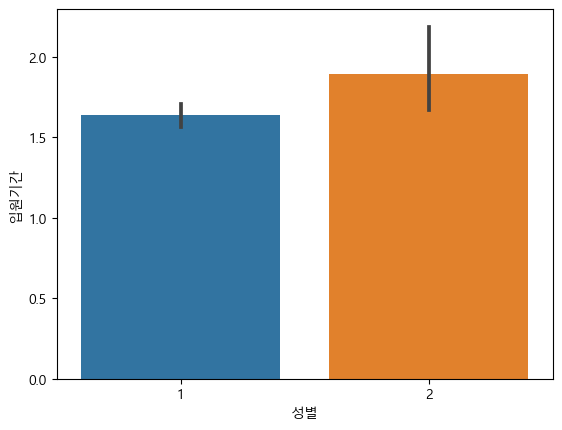

In [43]:
sns.barplot(data=df_ROS_Analysis, x='성별', y='입원기간',)

In [ ]:
### 2.우울증여부와  입원기간
- 범주형
- 우울증이 없는 환자의 입원기간이 더 긴 것으로 봐서 우울증과 입원기관의 상관관계가 없어보임. 

In [44]:
df_depr = df_ROS_Analysis[['입원기간', '우울증여부']]
df_depr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   입원기간    1894 non-null   int64
 1   우울증여부   1894 non-null   int64
dtypes: int64(2)
memory usage: 29.7 KB


In [45]:
df_depr.pivot_table(index='우울증여부', values='입원기간', aggfunc=np.mean)

,입원기간
우울증여부,
0,1.742842
1,1.476190
2,1.000000


<Axes: xlabel='우울증여부', ylabel='입원기간'>

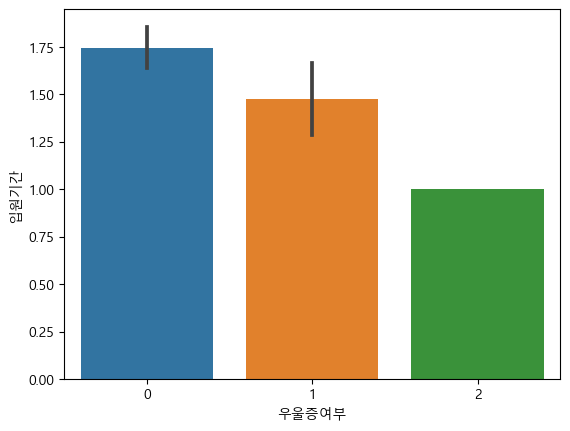

In [46]:
sns.barplot(data=df_ROS_Analysis, x='우울증여부', y='입원기간',)

### 3.종양진행여부와  입원기간
- 범주형
- 종양이 있을때 1  입원기간이 조금 더 길어지는 것을 확인할 수 있음 

In [47]:
df_tumor = df_ROS_Analysis[['입원기간', '종양진행여부']]
df_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   입원기간    1894 non-null   int64
 1   종양진행여부  1894 non-null   int64
dtypes: int64(2)
memory usage: 29.7 KB


<Axes: xlabel='종양진행여부', ylabel='입원기간'>

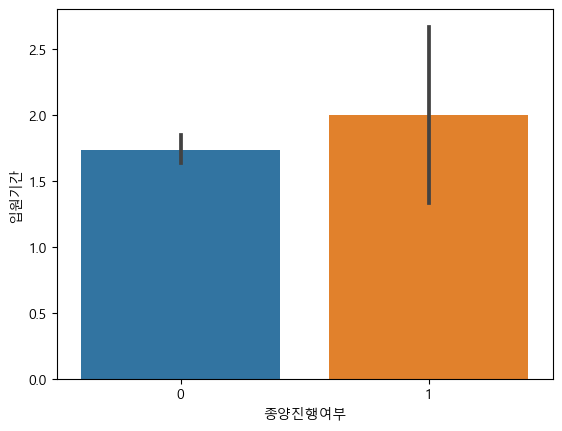

In [49]:
sns.barplot(data=df_ROS_Analysis, x='종양진행여부', y='입원기간',)

### 4.재발여부와  입원기간
- 은 검정 안함. 

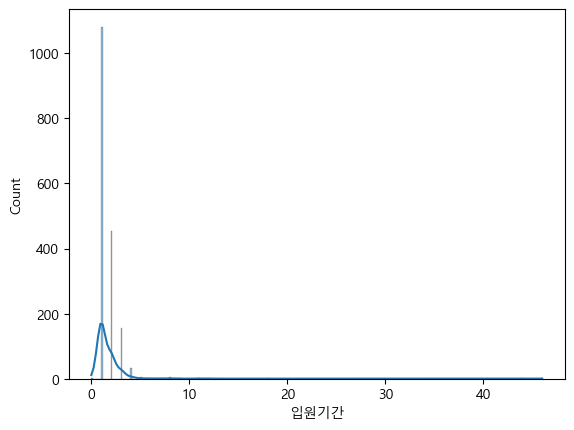

In [8]:
### 데이터 타입과 분포 
## 목표변수 확인 필요 : 대부분 범주형 why? 예측률이 높아야 하기에 분류를 많이 함. 
sns.histplot(data=df_ROS_Analysis, x='입원기간',kde=True)
plt.show()

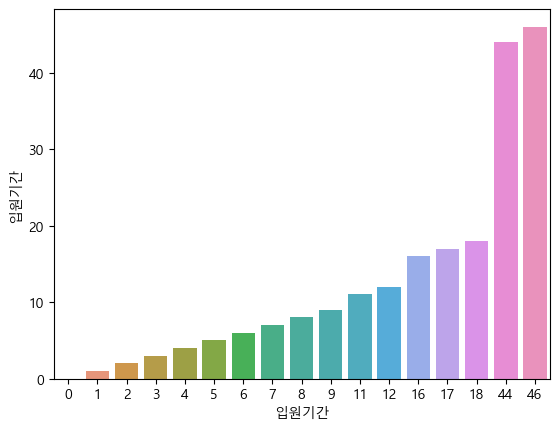

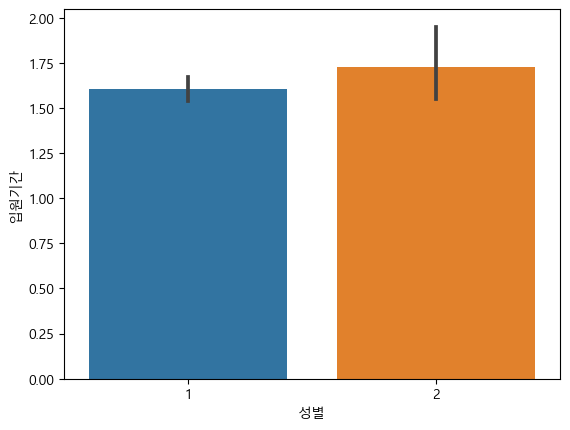

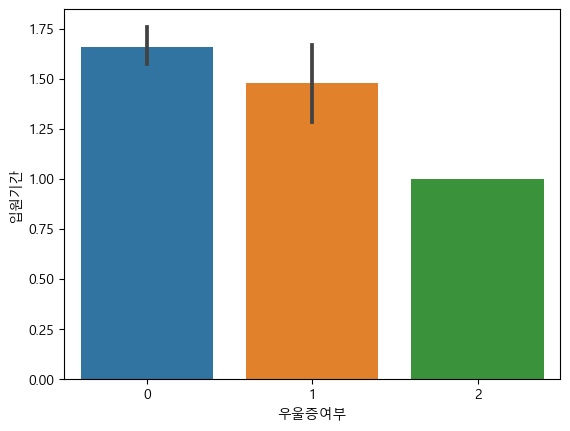

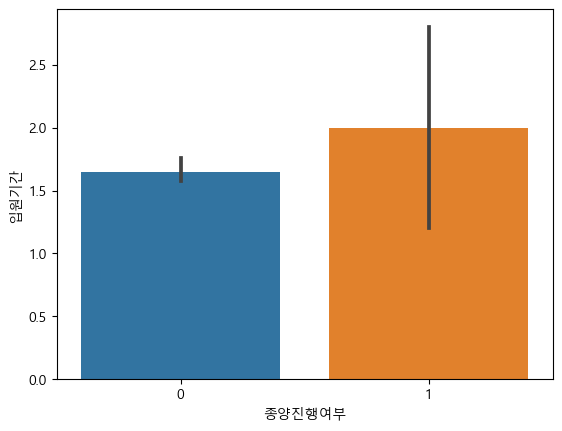

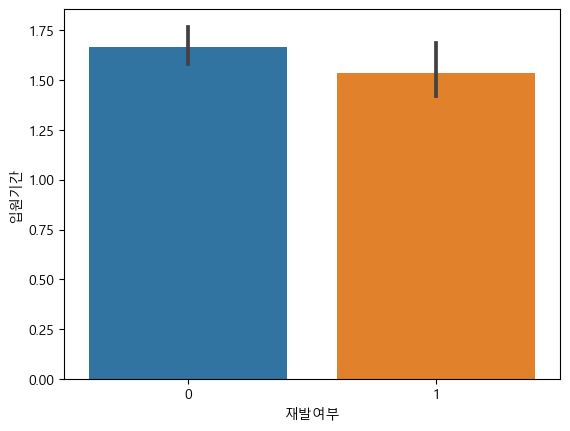

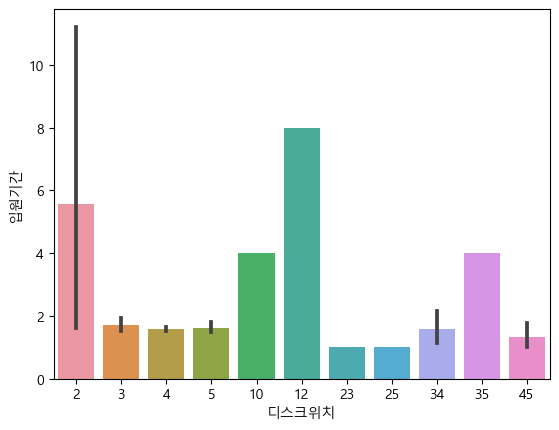

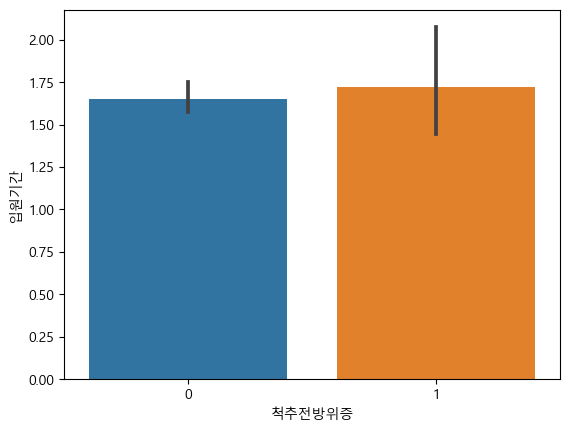

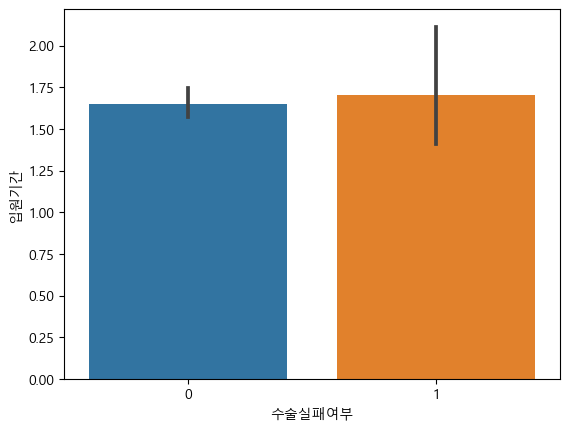

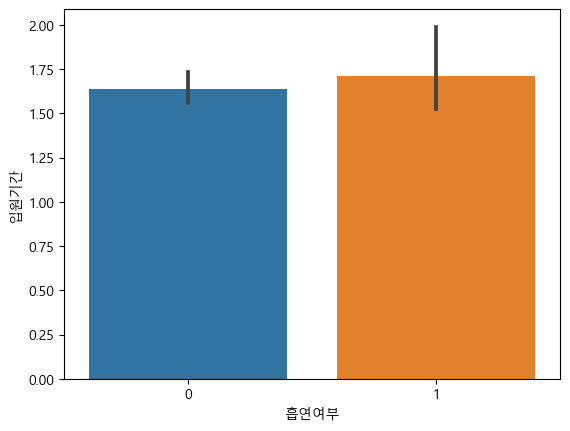

In [9]:
for item in df_ROS_Analysis :
    sns.barplot(data=df_ROS, x=item , y='입원기간')
    plt.show()

In [10]:
df_ROS_list = df_ROS.describe().columns.to_list()
df_ROS_list

['Unnamed: 0',
 '신장',
 '체중',
 '연령',
 '성별',
 'Large Lymphocyte',
 '우울증여부',
 '종양진행여부',
 '재발여부',
 '디스크단면적',
 '디스크위치',
 '척추전방위증',
 '수술시간',
 '수술실패여부',
 '흡연여부',
 'Instability',
 '입원기간']

#### 연속형 범주형 

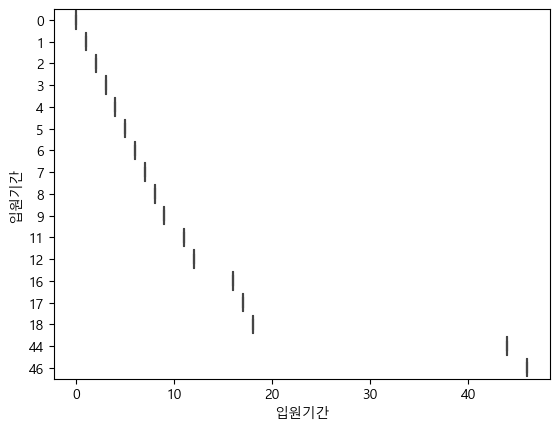

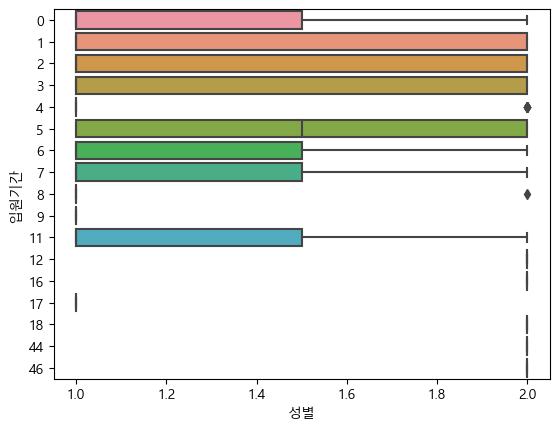

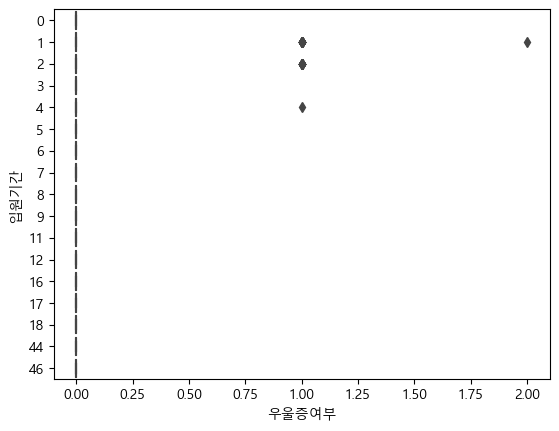

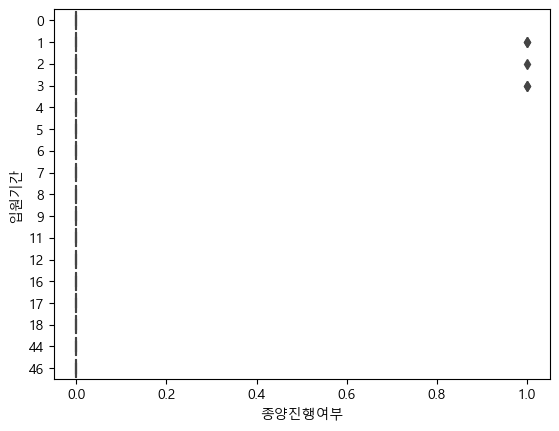

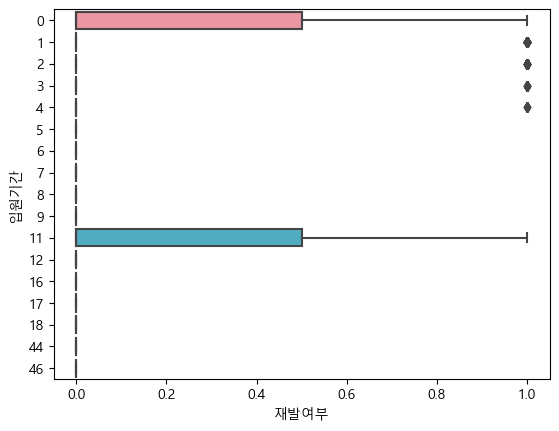

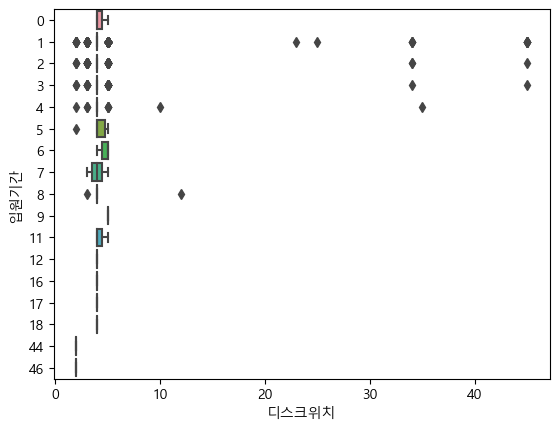

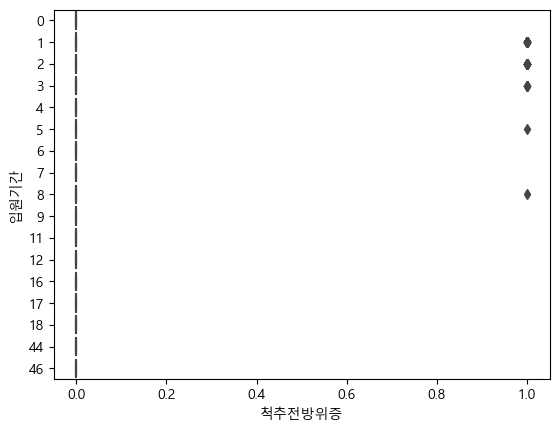

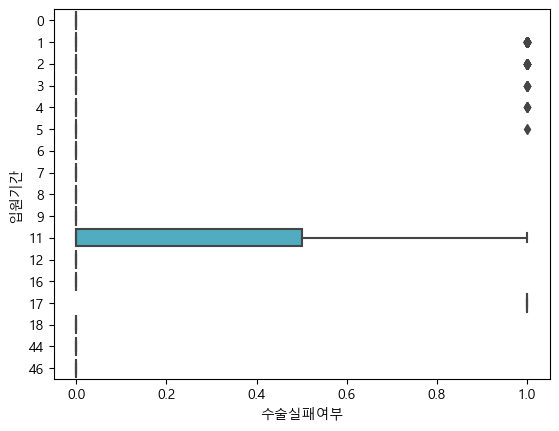

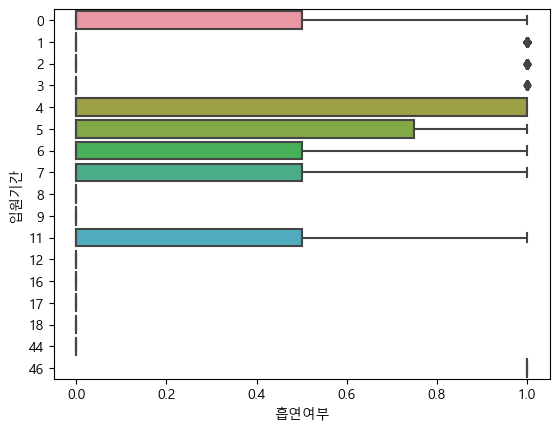

In [11]:
## boxplot/barplot으로 그리기. 
for item in df_ROS_Analysis :
    sns.boxplot(data=df_ROS, x=item, y='입원기간', orient='h')
    plt.show()